<a href="https://colab.research.google.com/github/DANGKHOIk22/data-science/blob/main/3_3_OutlineDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("diabetes_prediction_dataset.csv")

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
5759,Female,58.0,0,0,No Info,32.03,5.0,126,0
5760,Male,25.0,0,0,never,29.96,5.0,90,0
5761,Female,61.0,0,0,current,23.49,4.8,80,0
5762,Male,68.0,0,0,No Info,21.73,4.5,155,0


In [4]:
df['age'].sample(5)

2717    69.0
2691    80.0
2195    37.0
1996    43.0
1599    80.0
Name: age, dtype: float64

In [5]:
df['age'].describe()

count    5764.000000
mean       42.179028
std        22.593015
min         0.080000
25%        24.000000
50%        43.000000
75%        60.000000
max        80.000000
Name: age, dtype: float64

**Z1- SCORES**

In [6]:
trf=FunctionTransformer(func=np.log)

In [7]:
df['agelog']=trf.fit_transform(df['age'])

In [15]:
%matplotlib inline

"plt.subplot(2,2,2)\nsns.displot(df['bmi'])\n\nplt.subplot(2,2,3)\nsns.displot(df['HbA1c_level'])\n\nplt.subplot(2,2,4)\nsns.displot(df['blood_glucose_level'])\n\nplt.show()\nplt.clf()"

<Figure size 1600x500 with 0 Axes>

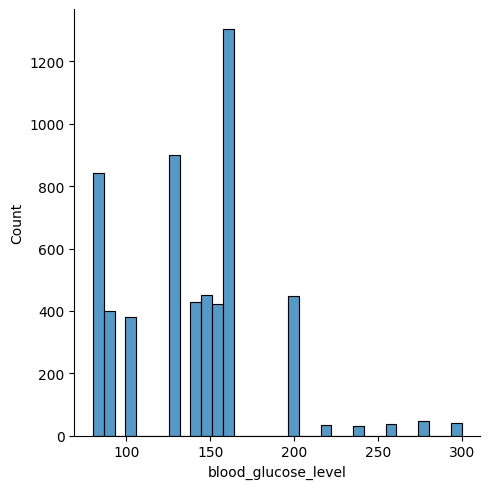

In [20]:
plt.figure(figsize=(16,5))
#plt.subplot(2,2,1)
sns.displot(df['blood_glucose_level'])

'''plt.subplot(2,2,2)
sns.displot(df['bmi'])

plt.subplot(2,2,3)
sns.displot(df['HbA1c_level'])

plt.subplot(2,2,4)
sns.displot(df['blood_glucose_level'])

plt.show()
plt.clf()'''

In [9]:
df['agelog'].std()

0.9299656146379929

In [10]:
print(df['agelog'].mean()-3*df['agelog'].std())
print(df['agelog'].mean()+3*df['agelog'].std())

0.6859398329504036
6.26573352077836


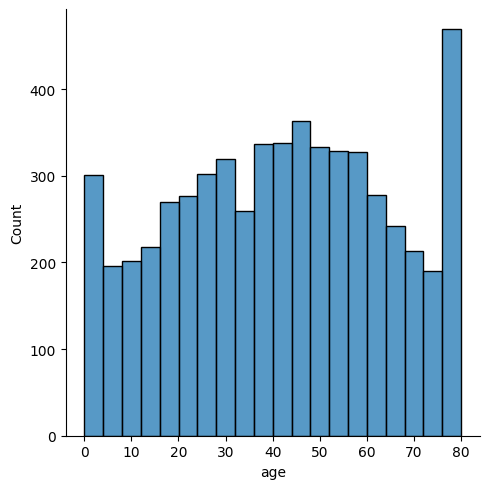

In [11]:
sns.displot(df['age'])

In [12]:
df.age

0       80.0
1       54.0
2       28.0
3       36.0
4       76.0
        ... 
5759    58.0
5760    25.0
5761    61.0
5762    68.0
5763     9.0
Name: age, Length: 5764, dtype: float64

In [13]:
df[(df['agelog']>0.68) & (df['agelog']<6.26)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,agelog
0,Female,80.0,0,1,never,25.19,6.6,140,0,4.382027
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,3.988984
2,Male,28.0,0,0,never,27.32,5.7,158,0,3.332205
3,Female,36.0,0,0,current,23.45,5.0,155,0,3.583519
4,Male,76.0,1,1,current,20.14,4.8,155,0,4.330733
...,...,...,...,...,...,...,...,...,...,...
5759,Female,58.0,0,0,No Info,32.03,5.0,126,0,4.060443
5760,Male,25.0,0,0,never,29.96,5.0,90,0,3.218876
5761,Female,61.0,0,0,current,23.49,4.8,80,0,4.110874
5762,Male,68.0,0,0,No Info,21.73,4.5,155,0,4.219508


**IQR**

In [29]:
df['blood_glucose_level'].describe()

count    5764.000000
mean      138.164296
std        41.113555
min        80.000000
25%       100.000000
50%       140.000000
75%       159.000000
max       300.000000
Name: blood_glucose_level, dtype: float64

<Axes: ylabel='blood_glucose_level'>

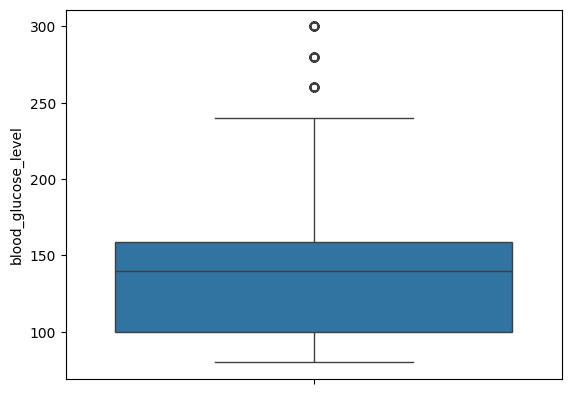

In [28]:
sns.boxplot(df['blood_glucose_level'])

In [30]:
percentile25 = df['blood_glucose_level'].quantile(0.25)
percentile75 = df['blood_glucose_level'].quantile(0.75)

In [31]:
iqr=percentile75-percentile25

In [32]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [33]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 247.5
Lower limit 11.5


**Finding Outliers**

In [42]:
new_df=df[df['blood_glucose_level']<upper_limit]

**Trimming**

<Axes: ylabel='blood_glucose_level'>

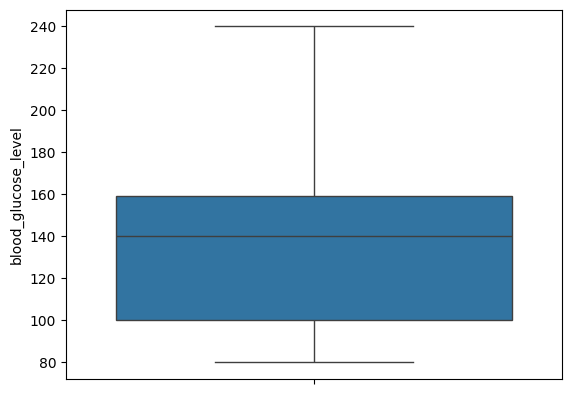

In [43]:
sns.boxplot(new_df['blood_glucose_level'])

**Capping**

In [47]:
new_df=df.copy()

new_df['blood_glucose_level']=np.where(new_df['blood_glucose_level']>upper_limit,upper_limit,np.where(new_df['blood_glucose_level']<lower_limit,lower_limit,new_df['blood_glucose_level']))

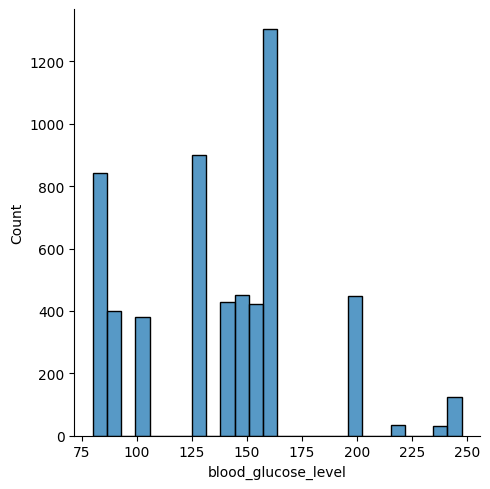

In [48]:
sns.displot(new_df['blood_glucose_level'])

<Axes: ylabel='blood_glucose_level'>

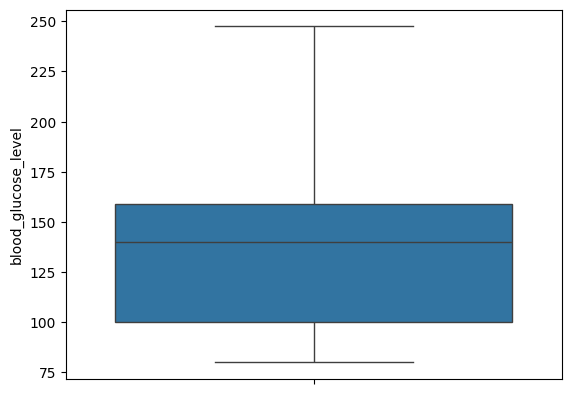

In [49]:
sns.boxplot(new_df['blood_glucose_level'])